# Particle Swarm Optimization

Evolutionary algorithms belong to the family of optimization techniques inspired by the process of natural selection. These algorithms mimic the principles of biological evolution to find optimal solutions to complex problems.

We will explore Particle Swarm Optimization (PSO) - a popular optimization technique inspired by the social behavior of birds and fish. PSO is a heuristic search algorithm used to find optimal solutions in complex and high-dimensional search spaces.

Particle Swarm Optimization is a population-based optimization technique introduced by Eberhart and Kennedy in 1995. It is inspired by the collective behavior of birds and fish in nature. The algorithm starts with a group of particles (potential solutions) moving through the search space. Each particle represents a potential solution and has a position and velocity. The particles explore the search space and communicate with each other to find the optimal solution.

Particle swarm optimization involves a group of individuals at different points in the solution space, all using real-life swarm concepts to find an optimal solution in the space. Imagine a swarm of bees that spread out looking for flowers and gradually converging on an area that has the most density of flowers. As more bees find the flowers, more are attracted to it. At its core, this is what particle swarm optimization entails. Particles make velocity adjustments based on an inertia component, cognitive component, and social component.

In [1]:
import random

def objective_function(x):
    return x**2 - 4*x + 4

def pso(population_size, iterations):
    swarm = [random.uniform(-10, 10) for _ in range(population_size)]
    pBest = swarm[:]
    gBest = min(swarm, key=objective_function)

    for _ in range(iterations):
        for i in range(population_size):
            velocity = random.uniform(-1, 1)
            swarm[i] += velocity

            if objective_function(swarm[i]) < objective_function(pBest[i]):
                pBest[i] = swarm[i]

            if objective_function(swarm[i]) < objective_function(gBest):
                gBest = swarm[i]

    return gBest

population_size = 50
iterations = 100
optimal_solution = pso(population_size, iterations)
print("Optimal Solution:", optimal_solution)
print("Optimal Objective Value:", objective_function(optimal_solution))

Optimal Solution: 1.998166944796724
Optimal Objective Value: 3.360091378468155e-06


In [2]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

DIMENSIONS = 2              # Number of dimensions
GLOBAL_BEST = 0             # Global Best of Cost function
B_LO = -5                   # Upper boundary of search space
B_HI = 5                    # Upper boundary of search space

POPULATION = 20             # Number of particles in the swarm
V_MAX = 0.1                 # Maximum velocity value
PERSONAL_C = 2.0            # Personal coefficient factor
SOCIAL_C = 2.0              # Social coefficient factor
CONVERGENCE = 0.001         # Convergence value
MAX_ITER = 100              # Maximum number of iterrations

# Particle class
class Particle():
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()

class Swarm():
    def __init__(self, pop, v_max):
        self.particles = []             # List of particles in the swarm
        self.best_pos = None            # Best particle of the swarm
        self.best_pos_z = math.inf      # Best particle of the swarm

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.rand(2) * v_max
            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)
            if self.best_pos != None and particle.pos_z < self.best_pos_z:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z
            else:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z

# Evaluate objective/cost function (Ackley)
def cost_function(x, y, a=20, b=0.2, c=2*math.pi):
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

In [36]:
def particle_swarm_optimization():

    # Initialize plotting variables
    x = np.linspace(B_LO, B_HI, 50)
    y = np.linspace(B_LO, B_HI, 50)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure("Particle Swarm Optimization")

    # Initialize swarm
    swarm = Swarm(POPULATION, V_MAX)

    # Initialize inertia weight
    inertia_weight = 0.5 + (np.random.rand()/2)
    
    curr_iter = 0
    while curr_iter < MAX_ITER:

        fig.clear()
        ax = fig.add_subplot(MAX_ITER, 1, curr_iter+1)
        ac = ax.contourf(X, Y, cost_function(X, Y), cmap='viridis')
        fig.colorbar(ac)

        for particle in swarm.particles:

            for i in range(0, DIMENSIONS):
                r1 = np.random.uniform(0, 1)
                r2 = np.random.uniform(0, 1)
                
                # Update particle's velocity
                personal_coefficient = PERSONAL_C * r1 * (particle.best_pos[i] - particle.pos[i])
                social_coefficient = SOCIAL_C * r2 * (swarm.best_pos[i] - particle.pos[i])
                new_velocity = inertia_weight * particle.velocity[i] + personal_coefficient + social_coefficient

                # Check if velocity is exceeded
                if new_velocity > V_MAX:
                    particle.velocity[i] = V_MAX
                elif new_velocity < -V_MAX:
                    particle.velocity[i] = -V_MAX
                else:
                    particle.velocity[i] = new_velocity

            ax.scatter(particle.pos[0], particle.pos[1], marker='*', c='r')
            ax.arrow(particle.pos[0], particle.pos[1], particle.velocity[0], particle.velocity[1], head_width=0.1, head_length=0.1, color='k')

            # Update particle's current position
            particle.pos += particle.velocity
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Update particle's best known position
            if particle.pos_z < cost_function(particle.best_pos[0], particle.best_pos[1]):
                particle.best_pos = particle.pos.copy()

                # Update swarm's best known position
                if particle.pos_z < swarm.best_pos_z:
                    swarm.best_pos = particle.pos.copy()
                    swarm.best_pos_z = particle.pos_z
                    
            # Check if particle is within boundaries
            if particle.pos[0] > B_HI:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] > B_HI:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[0] < B_LO:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] < B_LO:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

        plt.subplots_adjust(right = 0.95)
        plt.pause(0.00001)

        # Check for convergence
        if abs(swarm.best_pos_z - GLOBAL_BEST) < CONVERGENCE:
            print("The swarm has met convergence criteria after " + str(curr_iter) + " iterrations.")
            break
        curr_iter += 1
    # plt.show()

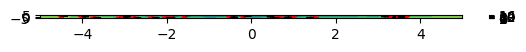

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [37]:
particle_swarm_optimization()